In [27]:
import pandas as pd
import numpy as np
import seaborn as sns 

In [28]:
data = pd.read_csv("heart.csv")

data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [29]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [30]:
data.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [31]:
cat_feat = []
col = list(data.columns)
for i in col:
    if data[i].dtype=="object":
        cat_feat.append(i)
cat_feat

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [32]:
for i in cat_feat:
    print(data[i].unique())

['M' 'F']
['ATA' 'NAP' 'ASY' 'TA']
['Normal' 'ST' 'LVH']
['N' 'Y']
['Up' 'Flat' 'Down']


In [33]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [34]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[("encoder", OneHotEncoder(), [1, 2, 6, 8, 10])], remainder="passthrough")
X = np.array(ct.fit_transform(X))

In [35]:
X

array([[0.0, 1.0, 0.0, ..., 0, 172, 0.0],
       [1.0, 0.0, 0.0, ..., 0, 156, 1.0],
       [0.0, 1.0, 0.0, ..., 0, 98, 0.0],
       ...,
       [0.0, 1.0, 1.0, ..., 0, 115, 1.2],
       [1.0, 0.0, 0.0, ..., 0, 174, 0.0],
       [0.0, 1.0, 0.0, ..., 0, 173, 0.0]], dtype=object)

In [36]:
from sklearn.model_selection import train_test_split, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [37]:
X_test.shape

(230, 20)

In [38]:
from xgboost import XGBClassifier
xg = XGBClassifier()
xg.fit(X_train, y_train)
y_predxg = xg.predict(X_test)

In [39]:
from sklearn.metrics import mean_absolute_error
a = cross_val_score(estimator=xg, X=X_train, y=y_train, cv =10)
print(mean_absolute_error(y_test, y_predxg))
print(a.mean())

0.11304347826086956
0.8503196930946292


c:\Users\yash0\Desktop\Python\Machine Learning\Projects\Medical\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

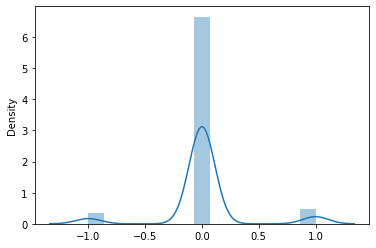

In [40]:
sns.distplot(y_test-y_predxg)

In [41]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=10000)
lr.fit(X_train, y_train)


LogisticRegression(max_iter=10000)

In [42]:
y_predlr = lr.predict(X_test)

In [43]:
logimean = cross_val_score(estimator=lr, X=X_train, y=y_train, cv =10)
print(mean_absolute_error(y_test, y_predlr))
print(logimean.mean())

0.13478260869565217
0.8647698209718669


c:\Users\yash0\Desktop\Python\Machine Learning\Projects\Medical\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

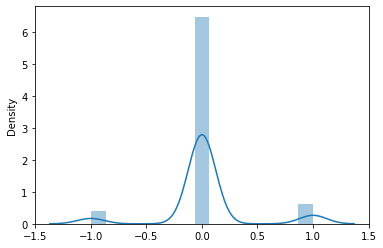

In [44]:
sns.distplot(y_test-y_predlr)

In [45]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=13,metric="minkowski", p=2)
knn.fit(X_train, y_train)
y_predknn = knn.predict(X_test)

In [46]:
knnmean = cross_val_score(estimator=knn, X=X_train, y=y_train, cv =10)
print(mean_absolute_error(y_test, y_predknn))
print(knnmean.mean())

0.28695652173913044
0.6976342710997443


In [47]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
y_prednb = nb.predict(X_test)

In [48]:
nbmean = cross_val_score(estimator=nb, X=X_train, y=y_train, cv =20)
print(mean_absolute_error(y_test, y_prednb))
print(nbmean.mean())


0.12608695652173912
0.8545378151260504


In [49]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=20, criterion="entropy")
rf.fit(X_train, y_train)
y_predrf = rf.predict(X_test) 

In [50]:
rfmean = cross_val_score(estimator=rf, X=X_train, y=y_train, cv =20)
print(mean_absolute_error(y_test, y_predrf))
print(rfmean.mean())

0.11739130434782609
0.8429411764705883
